In [47]:
#Network Analysis for Farmers Participating the Agroconcept
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [48]:
filename = 'paper2/3 Edges_agroconcept_complete.csv'
df = pd.read_csv(filename, delimiter = ';')

In [49]:
df.head()

,sender_id,receiver_id,frequency,friend,workmate,neighbour,familymember,partner,colleague_association,other,...,workmate_bef,neighbour_bef,familymember_bef,partner_bef,colleague_association_bef,other_bef,influence_part,knowledge,advice_freq,trust
0,1,2,1,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0,4
1,1,20,2,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2,4
2,1,26,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0,4
3,1,14,2,0,1,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,2,4
4,1,15,2,0,1,1,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1,4


In [50]:
# To put all the relationship columns into one column for further analyssi, convert binary to decimal format. 
df['relationship'] = df.friend * 2**6 + df.workmate * 2**5 + df.neighbour * 2**4\
                    + df.other * 2**0

In [51]:
# Take frequency as weight
weight_col = 'frequency'
relationship_col = 'relationship'
df.fillna(value={weight_col:-1}, inplace=True)

In [52]:
# Create a directed graph 
G = nx.DiGraph()

In [53]:
#Iterate over DataFrame rows to get (index, Series) pairs.
#Connect nodes(sender_id and receiver_id)together, and define parameters weight and relationship
for row in df[['sender_id', 'receiver_id', weight_col, relationship_col]].iterrows():
    u = int(row[1].sender_id)
    v = int(row[1].receiver_id)
    
    G.add_node(u)
    G.add_node(v)
    G.add_edge(u, v, weight = row[1][weight_col], relationship = row[1][relationship_col])

In [54]:
# create the nodes list for the use of graph drawing. Since both sender_id and received_id come from the agro_concept, 
# wen can either use sender_id or receiver_id. 
in_agro = list(set(df.sender_id))

In [55]:
width = [G[u][v]['weight']**2 for u, v in G.edges()]
color=[G[u][v]['relationship'] for u, v in G.edges()]

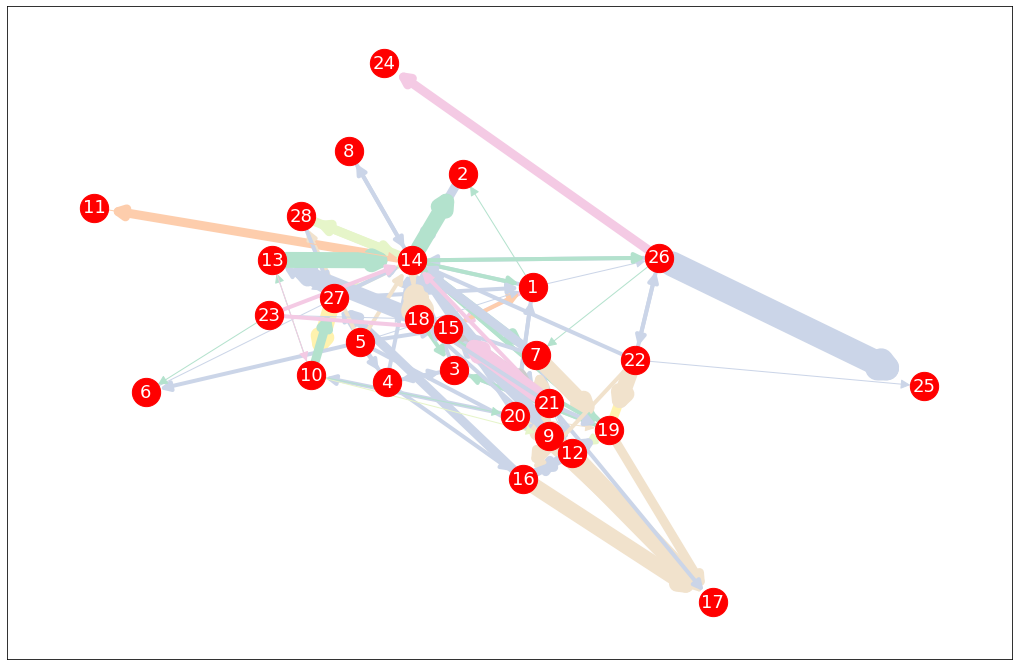

In [56]:
#Draw the graph and choose the spring_layout to have a clearer picture
plt.figure(figsize=(18, 12))
pos = nx.spring_layout(G, 0.5, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=800, node_color='red')

nx.draw_networkx_labels(G, pos, font_size=18, font_color='white')
nx.draw_networkx_edges(G, pos, 
                      width=width, 
                      edge_color = color, 
                      alpha=1, 
                      edge_cmap=plt.cm.Pastel2,
                       arrows=True,
                       arrowsize=20,
                       node_size=800)
plt.show()

In [57]:
#Use degree centrality to measure the importance of a node in a network by taking a look at the number of neighbors
#it has and the number of nodes it is connected to.

deg_cen = nx.degree_centrality(G)
deg_cen_sorted = sorted(deg_cen.items(), key=lambda x: x[1], reverse=True)[:5]
deg_cen_sorted

[(14, 1.1481481481481481),
 (19, 0.5185185185185185),
 (12, 0.5185185185185185),
 (20, 0.4074074074074074),
 (1, 0.37037037037037035)]

In [58]:
#Implement betweenness centrality to see the number of times a node acts as a bridge 
#along the shortest path between two other nodes.
#a measure for quantifying the control of a person on the communication between others in a social network

deg_bet = nx.betweenness_centrality(G)
deg_bet_sorted = sorted(deg_bet.items(), key=lambda x: x[1], reverse=True)[:5]
deg_bet_sorted

[(14, 0.4104610410165966),
 (19, 0.09730701397368065),
 (26, 0.07488355266133044),
 (12, 0.07328268439379552),
 (18, 0.06922285533396645)]

In [65]:
#Implement closeness centrality, which indicates how close a node is to all other nodes
#it is calculated as the average of the shortesst path length from the node to every other node in the network
deg_clos = nx.closeness_centrality(G)
deg_clos_sorted = sorted(deg_clos.items(), key=lambda x: x[1], reverse=True)[:5]
deg_clos_sorted

[(14, 0.7901234567901234),
 (19, 0.5333333333333333),
 (1, 0.49612403100775193),
 (27, 0.49612403100775193),
 (18, 0.4848484848484848)]

In [70]:
#Implement pagerank centrality to find important nodes in the initiative. It evaluates the inlinks and outlinks.
deg_pagerank = nx.pagerank(G)
deg_pagerank_sorted = sorted(deg_pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
deg_pagerank_sorted

[(14, 0.20558272100418182),
 (19, 0.06294406298699491),
 (27, 0.05921705672125969),
 (1, 0.043860091667291635),
 (17, 0.04337270204584237)]